In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
!head data/2019-06-26/S_seaice_extent_daily_v3.0.csv

Year, Month, Day,     Extent,    Missing, Source Data
YYYY,    MM,  DD, 10^6 sq km, 10^6 sq km, Source data product web sites: http://nsidc.org/data/nsidc-0081.html and http://nsidc.org/data/nsidc-0051.html
1978,    10,  26,     17.624,      0.000, ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/south/daily/1978/nt_19781026_n07_v1.1_s.bin']
1978,    10,  28,     17.803,      0.000, ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/south/daily/1978/nt_19781028_n07_v1.1_s.bin']
1978,    10,  30,     17.670,      0.000, ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/south/daily/1978/nt_19781030_n07_v1.1_s.bin']
1978,    11,  01,     17.527,      0.000, ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/south/daily/1978/nt_19781101_n07_v1.1_s.bin']
1978,    11,  03,     17.486,      0.000, ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_se

In [15]:
dfs = pd.read_csv('data/2019-06-26/S_seaice_extent_daily_v3.0.csv', skiprows=[1])
dfn = pd.read_csv('data/2019-06-26/N_seaice_extent_daily_v3.0.csv', skiprows=[1])

In [14]:
dfs.head()

,Year,Month,Day,Extent,Missing,Source Data
0,1978,10,26,17.624,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...
1,1978,10,28,17.803,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...
2,1978,10,30,17.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...
3,1978,11,1,17.527,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...
4,1978,11,3,17.486,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...


In [30]:
def read_icedata(path):
    df = pd.read_csv(path, skiprows=[1])

    df.columns = [c.strip() for c in df.columns]
    

    df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    df.set_index('date', inplace=True)
    df.drop(['Source Data', 'Year', 'Month', 'Day'], axis=1, inplace=True)
    return df

dfs = read_icedata('data/2019-06-26/S_seaice_extent_daily_v3.0.csv')
dfn = read_icedata('data/2019-06-26/N_seaice_extent_daily_v3.0.csv')

In [33]:
dfn.head()

,Extent,Missing
date,,
1978-10-26,10.231,0.0
1978-10-28,10.420,0.0
1978-10-30,10.557,0.0
1978-11-01,10.670,0.0
1978-11-03,10.777,0.0


Text(0, 0.5, 'sea ice coverage / $10^6$ km$^2$')

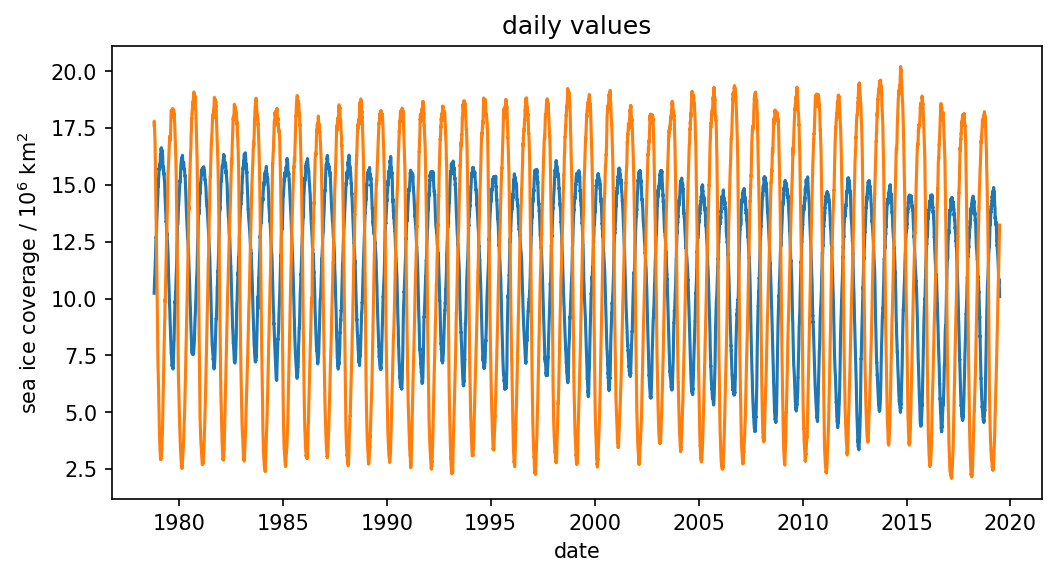

In [39]:
plt.figure(figsize=(8,4), dpi=150)


for i, (label, df) in enumerate(zip(['Arctic', 'Antarctic'], [dfn, dfs])):
    plt.plot(df.index, df['Extent'], label=label, color=f'C{i}')

plt.title('daily values')
plt.xlabel('date')
plt.ylabel('sea ice coverage / $10^6$ km$^2$')

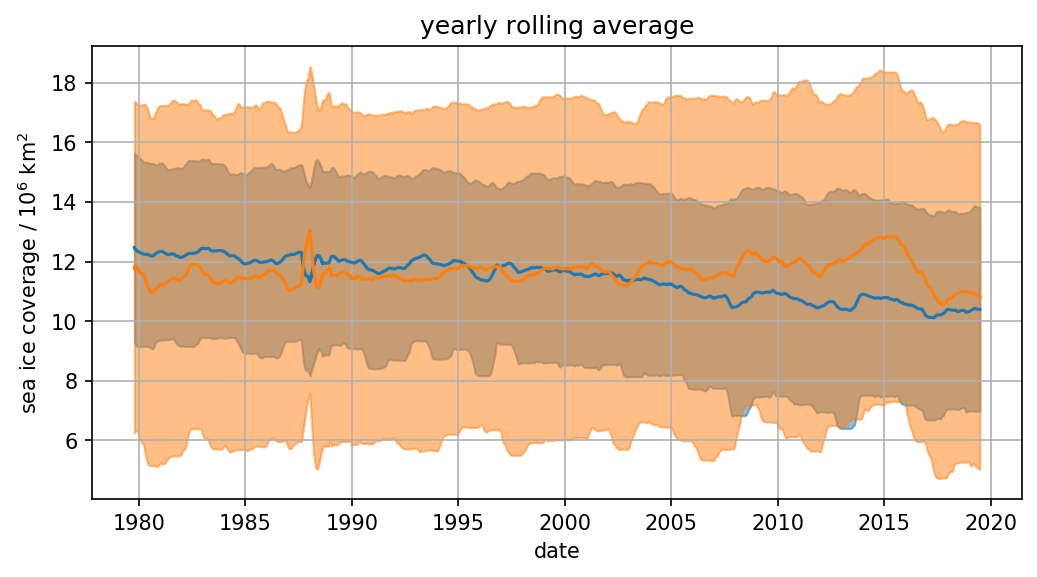

In [44]:
plt.figure(figsize=(8,4), dpi=150)


for i, (label, df) in enumerate(zip(['Arctic', 'Antarctic'], [dfn, dfs])):
    
    rolled = df['Extent'].rolling('365d',min_periods=180)
    ice_mean = rolled.mean()
    ice_std = rolled.std()
    
    plt.plot(ice_mean.index, ice_mean, label=label, color=f'C{i}')

    plt.fill_between(
        ice_mean.index,
        ice_mean - ice_std,
        ice_mean + ice_std,
        alpha=0.5,
        color=f'C{i}',
        label="uncert. 1$\sigma$"
    )

plt.title('yearly rolling average')
plt.xlabel('date')
plt.ylabel('sea ice coverage / $10^6$ km$^2$')
plt.grid()

Text(0, 0.5, 'sea ice coverage / $10^6$ km$^2$')

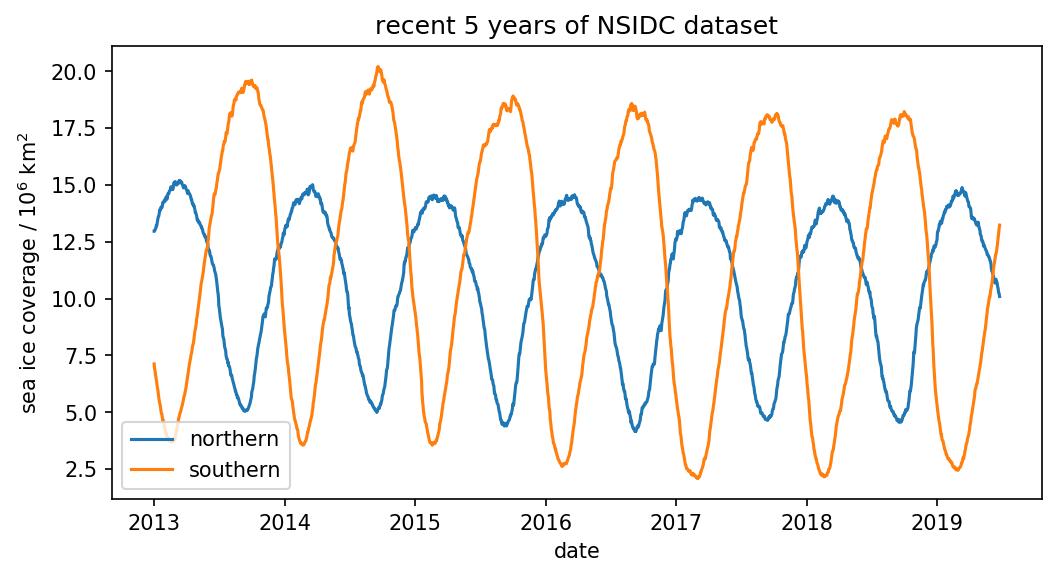

In [47]:
plt.figure(figsize=(8,4), dpi=150)

last_5_n = dfn.loc['2013-01-01':]
last_5_s = dfs.loc['2013-01-01':]

plt.plot(last_5_n.index, last_5_n['Extent'], label='northern')
plt.plot(last_5_s.index, last_5_s['Extent'], label='southern')

plt.legend()
plt.title('recent 5 years of NSIDC dataset')
plt.xlabel('date')
plt.ylabel('sea ice coverage / $10^6$ km$^2$')

Text(0, 0.5, 'sea ice coverage / $10^6$ km$^2$')

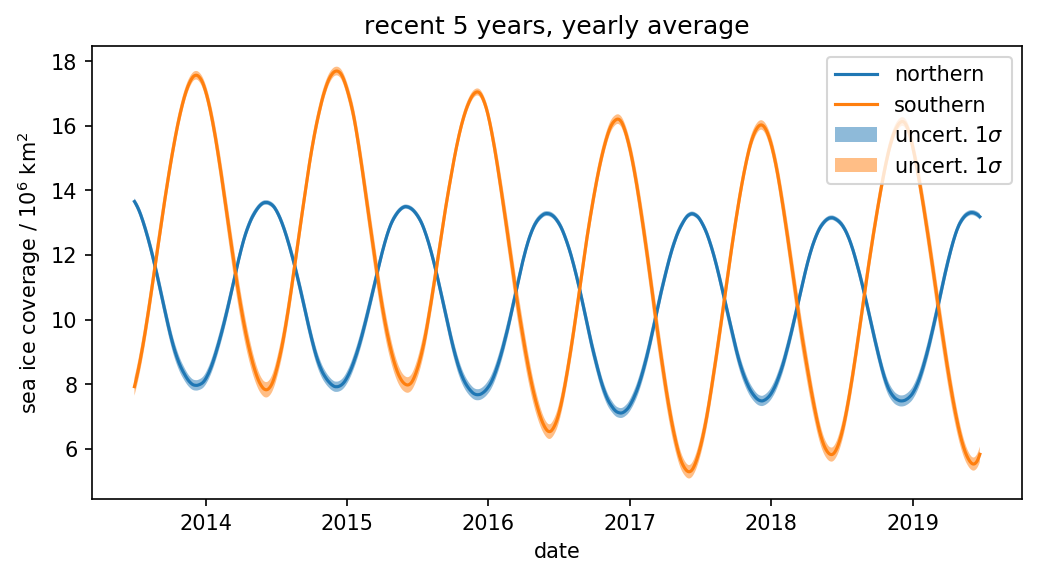

In [48]:
plt.figure(figsize=(8,4), dpi=150)

plt.plot(dtn.index,dtn['Extent'].rolling(182).mean(), label='northern')

plt.fill_between(
    dtn.index,
    dtn['Extent'].rolling(182).mean()+dtn['Extent'].rolling(182).std()/np.sqrt(182),
    dtn['Extent'].rolling(182).mean()-dtn['Extent'].rolling(182).std()/np.sqrt(182),
    alpha=0.5,
    label="uncert. 1$\sigma$"
    )

plt.plot(dts.index,dts['Extent'].rolling(182).mean(), label='southern')

plt.fill_between(
    dts.index,
    dts['Extent'].rolling(182).mean()+dts['Extent'].rolling(182).std()/np.sqrt(182),
    dts['Extent'].rolling(182).mean()-dts['Extent'].rolling(182).std()/np.sqrt(182),
    alpha=0.5,
    label="uncert. 1$\sigma$"
    )

plt.legend()
plt.title('recent 5 years, yearly average')
plt.xlabel('date')
plt.ylabel('sea ice coverage / $10^6$ km$^2$')

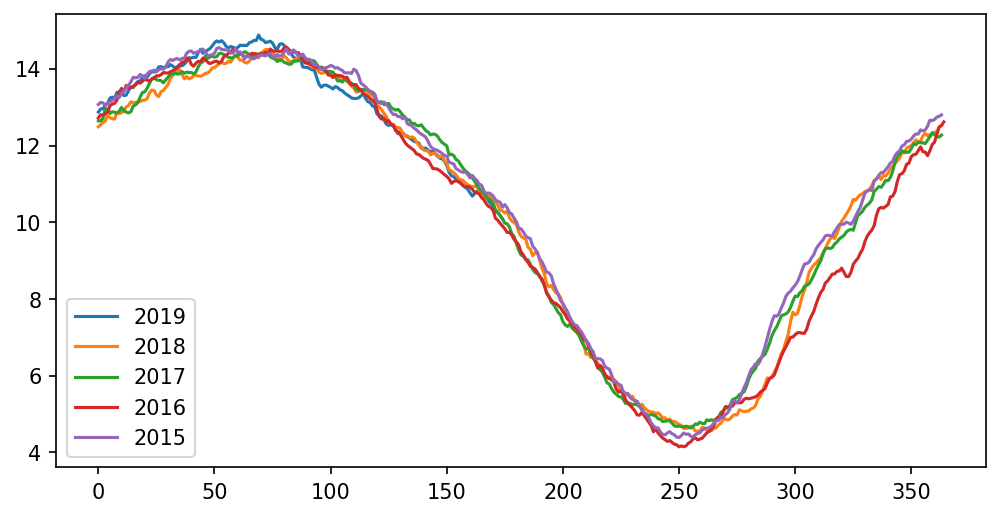

In [49]:
plt.figure(figsize=(8,4), dpi=150)

for y in np.arange(2015,2020)[::-1]:
    dt = dfn[
        (dfn.index >= pd.to_datetime(str(y)+'-01-01')) & 
        (dfn.index <  pd.to_datetime(str(y)+'-12-31'))
    ]
    
    plt.plot(
        (dt.index-pd.to_datetime(str(y)+'-01-01'))/pd.Timedelta('1d'),
        dt['Extent'].rolling(1).mean(),
        label=y,
    )

plt.legend()

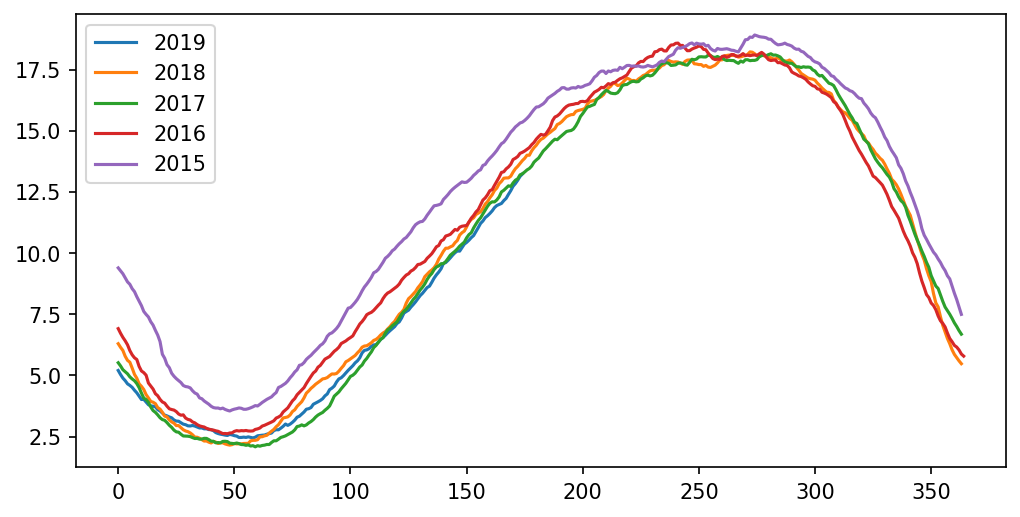

In [50]:
plt.figure(figsize=(8,4), dpi=150)

for y in np.arange(2015,2020)[::-1]:
    dt = dfs[
        (dfs.index >= pd.to_datetime(str(y)+'-01-01')) & 
        (dfs.index <  pd.to_datetime(str(y)+'-12-31'))
    ]
    
    plt.plot(
        (dt.index-pd.to_datetime(str(y)+'-01-01'))/pd.Timedelta('1d'),
        dt['Extent'].rolling(1).mean(),
        label=y,
    )

plt.legend()

In [51]:
np.arange(2020,2009)

array([], dtype=int64)

In [52]:
def plot_critical_years(df, c_start, c_end):

    plt.figure(figsize=(8,4), dpi=150)

    dtn = df[ 
            (df.index <  pd.to_datetime(str(c_start)+'-12-31'))
        ]

    daily_avg_val = dtn.resample('1D').interpolate().groupby(
        dtn.resample('1D').interpolate().index.dayofyear
    ).mean()['Extent']

    daily_avg_std = dtn.resample('1D').interpolate().groupby(
        dtn.resample('1D').interpolate().index.dayofyear
    ).std()['Extent']

    plt.plot(
        daily_avg_val,
        label='daily avg  until 2014'
    )

    plt.fill_between(
        np.arange(0,366),
        daily_avg_val+daily_avg_std,
        daily_avg_val-daily_avg_std,
        alpha=0.5
    )

    for y in np.arange(c_start,c_end):
        dt = df[
            (df.index >= pd.to_datetime(str(y)+'-01-01')) & 
            (df.index <  pd.to_datetime(str(y)+'-12-31'))
        ]

        plt.plot(
            (dt.index-pd.to_datetime(str(y)+'-01-01'))/pd.Timedelta('1d'),
            dt['Extent'].rolling(1).mean(),
            label=y,
        )

    plt.legend()
    plt.xlabel('days of year')
    plt.ylabel('sea ice coverage / $10^6$ km$^2$')

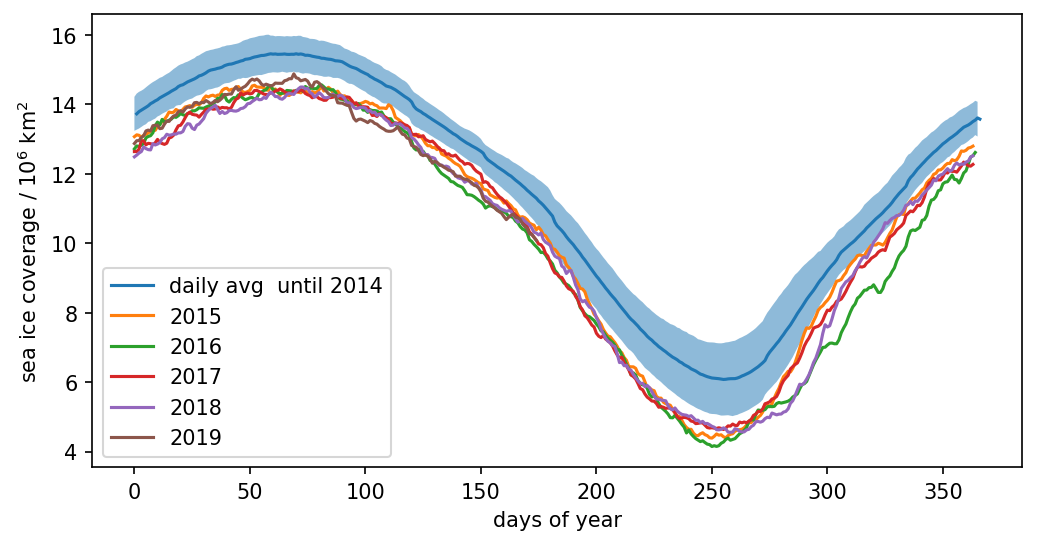

In [53]:
plot_critical_years(dfn,2015,2020)

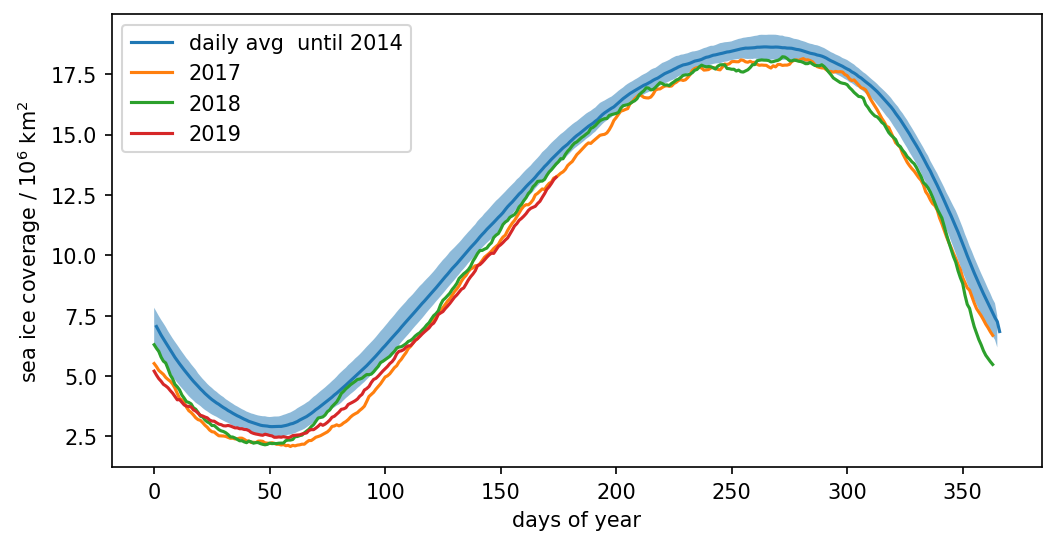

In [54]:
plot_critical_years(dfs,2017,2020)

In [55]:
df = dfn+dfs

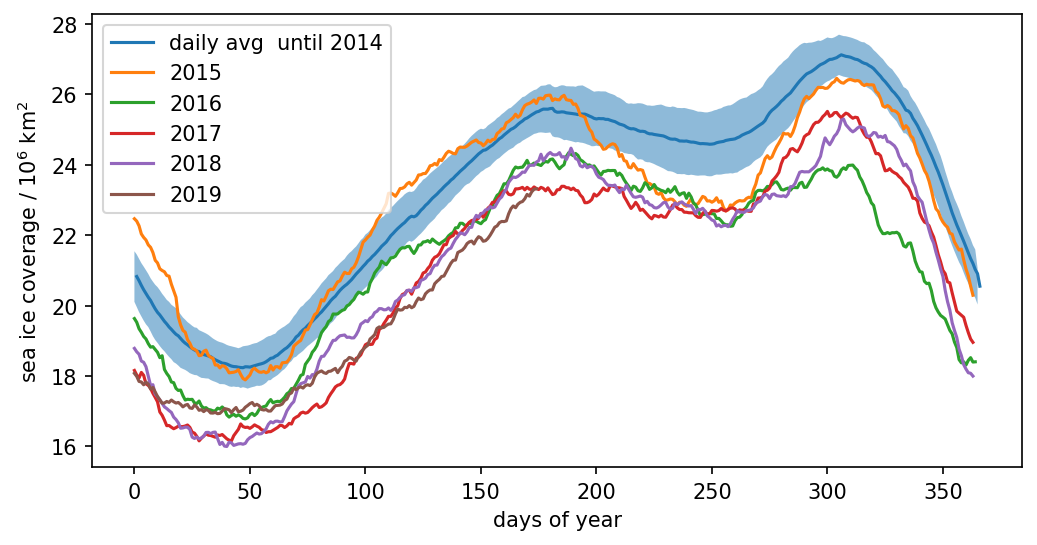

In [56]:
plot_critical_years(df,2015,2020)